In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Housing.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
data_cols = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living'
		              ,'floors', 'waterfront', 'view', 'grade'
                  ,'sqft_above', 'sqft_basement', 'yr_renovated'
                  ,'lat','sqft_lot15']]
data_cols

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15
0,7229300521,231300.0,2,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,5650
1,6414100192,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,7639
2,5631500400,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,8062
3,2487200875,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,5000
4,1954400510,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1509
21609,6600060120,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,7200
21610,1523300141,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,2007
21611,291310100,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1287


In [5]:
print(data_cols.describe().astype('int'))

data['zipcode'].nunique()

               id    price  bedrooms  bathrooms  sqft_living  floors  \
count       21613    21613     21613      21613        21613   21613   
mean   4580306147   540088         3          2         2079       1   
std    2876569751   367126         0          0          918       0   
min       1000102    75000         0          0          290       1   
25%    2123049194   321950         3          1         1427       1   
50%    3904930410   450000         3          2         1910       1   
75%    7308900445   645000         4          2         2550       2   
max    9900000190  7700000        33          8        13540       3   

       waterfront   view  grade  sqft_above  sqft_basement  yr_renovated  \
count       21613  21613  21613       21613          21613         21613   
mean            0      0      7        1788            291            84   
std             0      0      1         828            442           401   
min             0      0      1         290    

70

In [6]:
# we will add the mean value in for the data where id is same.
for i in data_cols.columns:
  print(f'{i} " {data[i].nunique()}')


# here id field having duplicate values
data_cols[data_cols['id'].isin(data_cols[data_cols['id'].duplicated()].id)].sort_values('id').groupby('id')['price'].mean()

# data[data_cols['id'].duplicated()].id
for i in data_cols[data_cols['id'].duplicated()].id:
  data_cols.loc[data['id'] == i,'price'] = data_cols[data_cols['id'] == i]['price'].mean()

id " 21436
price " 4029
bedrooms " 13
bathrooms " 30
sqft_living " 1038
floors " 6
waterfront " 2
view " 5
grade " 12
sqft_above " 946
sqft_basement " 306
yr_renovated " 70
lat " 5034
sqft_lot15 " 8689


In [7]:
data_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.3 MB


In [8]:
data.loc[(data_cols['id'] ==6021501535) & (data_cols['price'] == 565000.0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.5,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.5,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500


In [9]:
data_cols.loc[(data_cols['id'] ==6021501535) & (data_cols['price'] == 565000.0)]

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15
93,6021501535,565000.0,3,1.5,1580,1.0,0,0,8,1290,290,0,47.687,4500
94,6021501535,565000.0,3,1.5,1580,1.0,0,0,8,1290,290,0,47.687,4500


In [12]:
data_cols.loc[(data_cols['bathrooms'] < 1) | (data_cols['bedrooms'] < 1)]

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15
208,1222000055,180250.0,2,0.75,900,1.0,0,0,6,900,0,0,47.4604,14280
264,2123039032,369900.0,1,0.75,760,1.0,1,4,5,760,0,0,47.4683,14267
350,7325600160,299000.0,1,0.75,560,1.0,0,0,4,560,0,0,47.6750,19207
465,8658300340,80000.0,1,0.75,430,1.0,0,0,4,430,0,0,47.6499,7500
569,4045500710,405000.0,2,0.75,1160,1.0,0,0,6,870,290,0,47.6929,25346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19344,2114700090,151000.0,2,0.75,720,1.0,0,0,4,720,0,0,47.5323,4120
19452,3980300371,142000.0,0,0.00,290,1.0,0,0,1,290,0,0,47.5308,22850
20017,1025039168,290000.0,1,0.75,740,1.0,0,0,6,740,0,0,47.6741,3988
21610,1523300141,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,2007


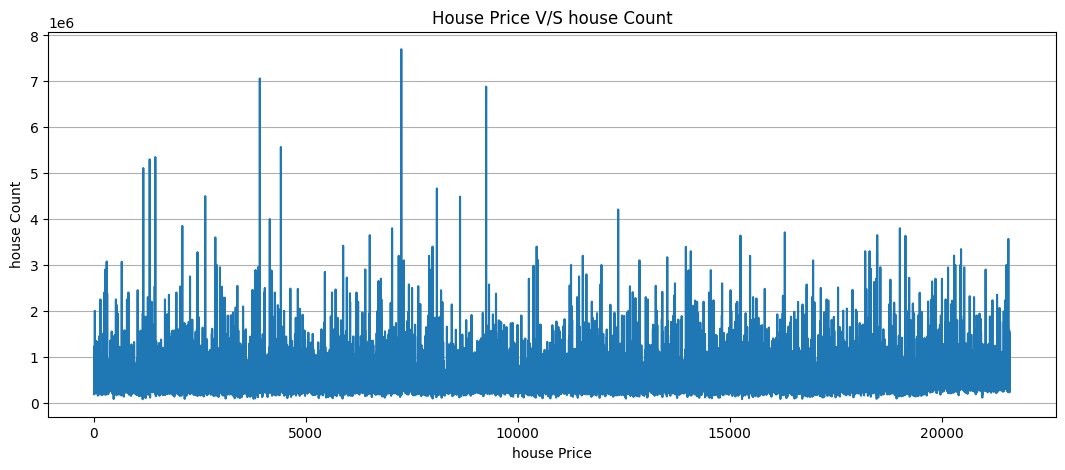

In [11]:
plt.figure(figsize=(13, 5))
plt.plot(data_cols['price'])
plt.xlabel('house Price')
plt.ylabel('house Count')
plt.title('House Price V/S house Count')
plt.grid(axis='y')
plt.show()

<ipython-input-18-e99021a04408>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cols['price_range'] = pd.cut(data_cols['price'],bins = bins)


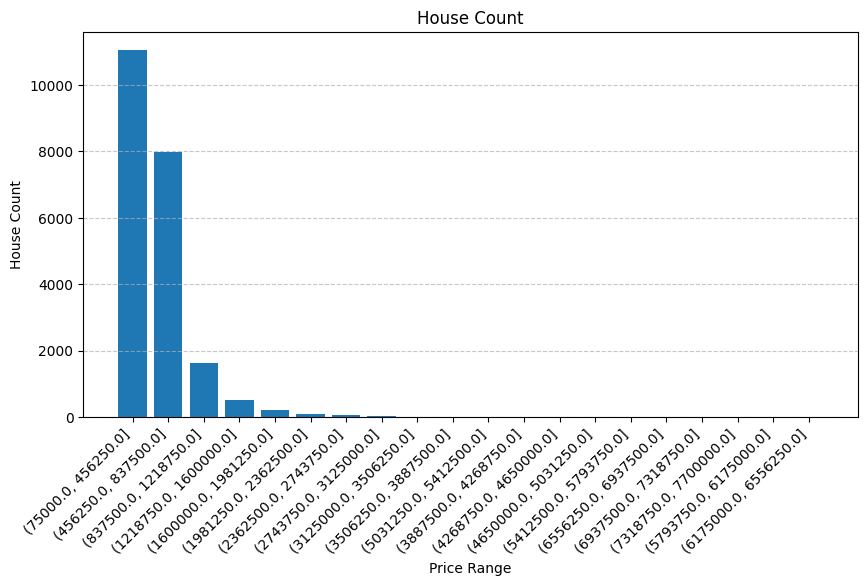

In [18]:
num_bin = 20
strt_bin = data_cols['price'].min()
stop_bin = data_cols['price'].max()
bins = np.linspace(strt_bin, stop_bin, num_bin + 1)
data_cols['price_range'] = pd.cut(data_cols['price'],bins = bins)
val_cnt=  data_cols['price_range'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(val_cnt.index.astype(str), val_cnt.values)
plt.xlabel('Price Range')
plt.xticks(rotation = 45, ha = "right")
plt.ylabel('House Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('House Count')
plt.show()

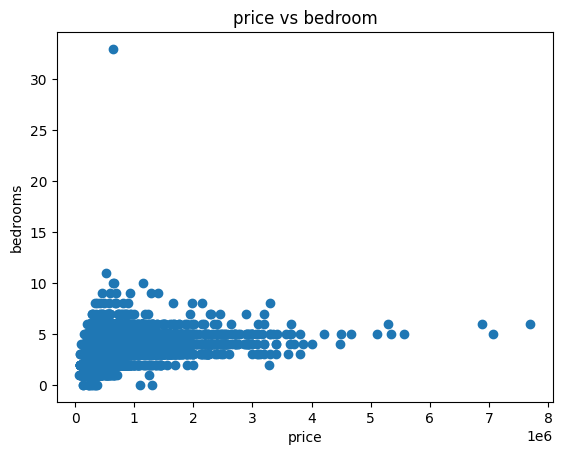

In [15]:
plt.scatter(data_cols['price'],data_cols['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('price vs bedroom')
plt.show()

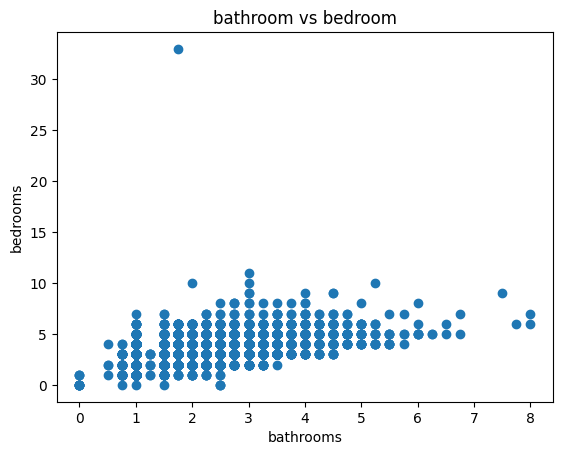

In [16]:
plt.scatter(data_cols['bathrooms'],data_cols['bedrooms'])
plt.xlabel('bathrooms')
plt.ylabel('bedrooms')
plt.title('bathroom vs bedroom')
plt.show()

Here from the graph we need to apply the normlization technique.

<ipython-input-21-7cc213f072fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cols['price_norm'] = scaler.fit_transform(data_cols[['price']])
<ipython-input-21-7cc213f072fa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cols['price_range'] = pd.cut(data_cols['price_norm'],bins = bins)


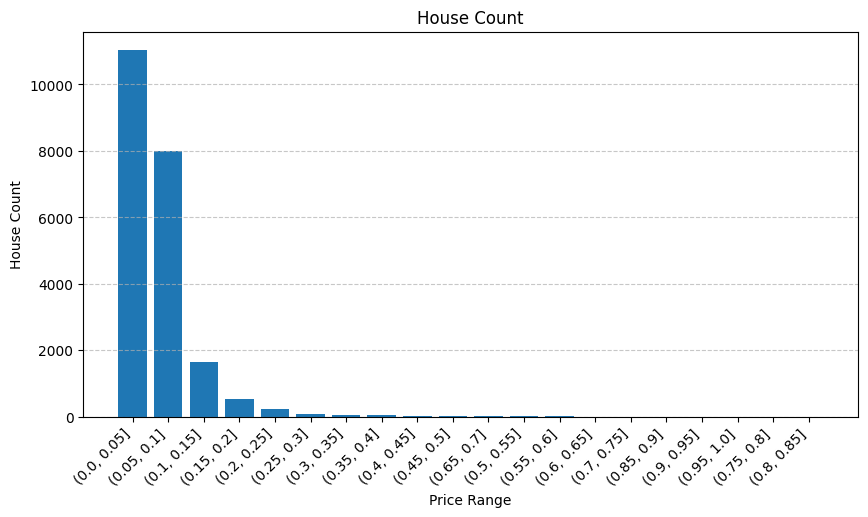

In [21]:
# we will do the normalization for the prices of the house:
scaler = MinMaxScaler()
data_cols['price_norm'] = scaler.fit_transform(data_cols[['price']])



#now we will plot the graph
num_bin = 20
strt_bin = data_cols['price_norm'].min()
stop_bin = data_cols['price_norm'].max()
bins = np.linspace(strt_bin, stop_bin, num_bin + 1)
data_cols['price_range'] = pd.cut(data_cols['price_norm'],bins = bins)
val_cnt=  data_cols['price_range'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(val_cnt.index.astype(str), val_cnt.values)
plt.xlabel('Price Range')
plt.xticks(rotation = 45, ha = "right")
plt.ylabel('House Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('House Count')
plt.show()

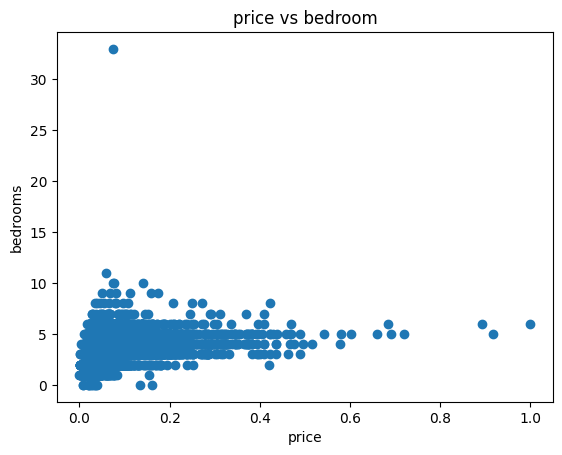

In [22]:
plt.scatter(data_cols['price_norm'],data_cols['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title('price vs bedroom')
plt.show()

In [9]:
data_cols[['id','date','price','bedrooms','bathrooms','sqft_living','zipcode']].head(1000)

,id,date,price,bedrooms,bathrooms,sqft_living,zipcode
0,7229300521,20141013T000000,231300.0,2,1.00,1180,98178
1,6414100192,20141209T000000,538000.0,3,2.25,2570,98125
2,5631500400,20150225T000000,180000.0,2,1.00,770,98028
3,2487200875,20141209T000000,604000.0,4,3.00,1960,98136
4,1954400510,20150218T000000,510000.0,3,2.00,1680,98074
...,...,...,...,...,...,...,...
995,7437100570,20140821T000000,291000.0,4,2.50,1860,98038
996,8856004730,20140917T000000,199950.0,2,2.75,1590,98001
997,3856902996,20140804T000000,553500.0,2,1.00,850,98105
998,1442800370,20150415T000000,189950.0,2,1.00,1030,98038


In [48]:
pd.DataFrame(data.groupby('zipcode')['price'].count().astype(int)).sort_values('price',ascending=False)

,price
zipcode,
98103,602
98038,590
98115,583
98052,574
98117,553
...,...
98102,105
98010,100
98024,81


In [13]:
data.dropna(inplace=True)

In [25]:
data_cols.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_lot15', 'price_range', 'price_norm'],
      dtype='object')

In [26]:
x = data_cols[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_lot15']]
y = data_cols['price_norm']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [34]:
x_train

,id,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15
12856,428100580,3,1.75,1970,1.0,0,0,7,1300,670,0,47.5107,8768
8020,8150600195,4,2.75,1540,1.0,0,2,7,850,690,0,47.5491,4840
2386,6151800486,2,1.00,1270,1.0,0,0,6,1270,0,0,47.3375,17699
14371,1326049170,3,1.00,1720,1.0,0,0,7,860,860,0,47.7439,9998
14359,106000395,3,1.00,1410,1.0,0,0,7,1410,0,0,47.7040,8042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18965,1761300650,4,2.00,1710,1.0,0,0,7,1030,680,0,47.3950,7272
3966,5152600090,5,2.50,2340,1.0,0,0,8,1670,670,0,47.3307,11000
8573,3622069095,4,3.50,3420,2.0,0,0,9,3420,0,0,47.3534,49223
932,6151800624,3,1.00,1250,1.0,0,0,6,1250,0,0,47.3414,15654


<Axes: >

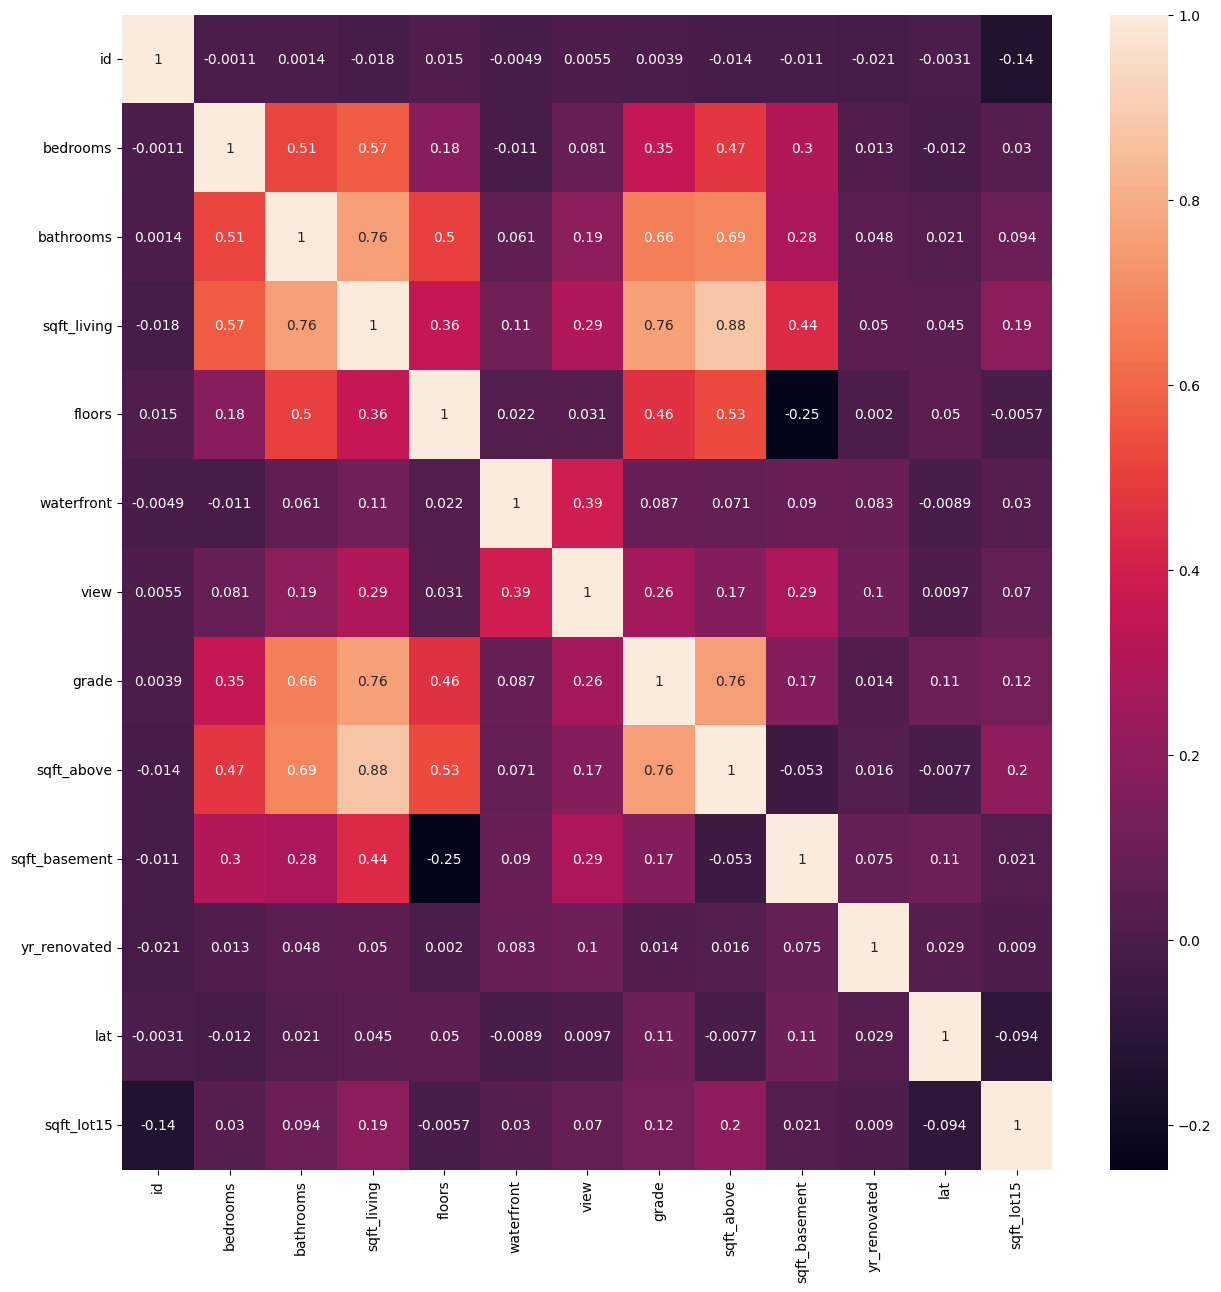

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train.corr(),annot=True)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

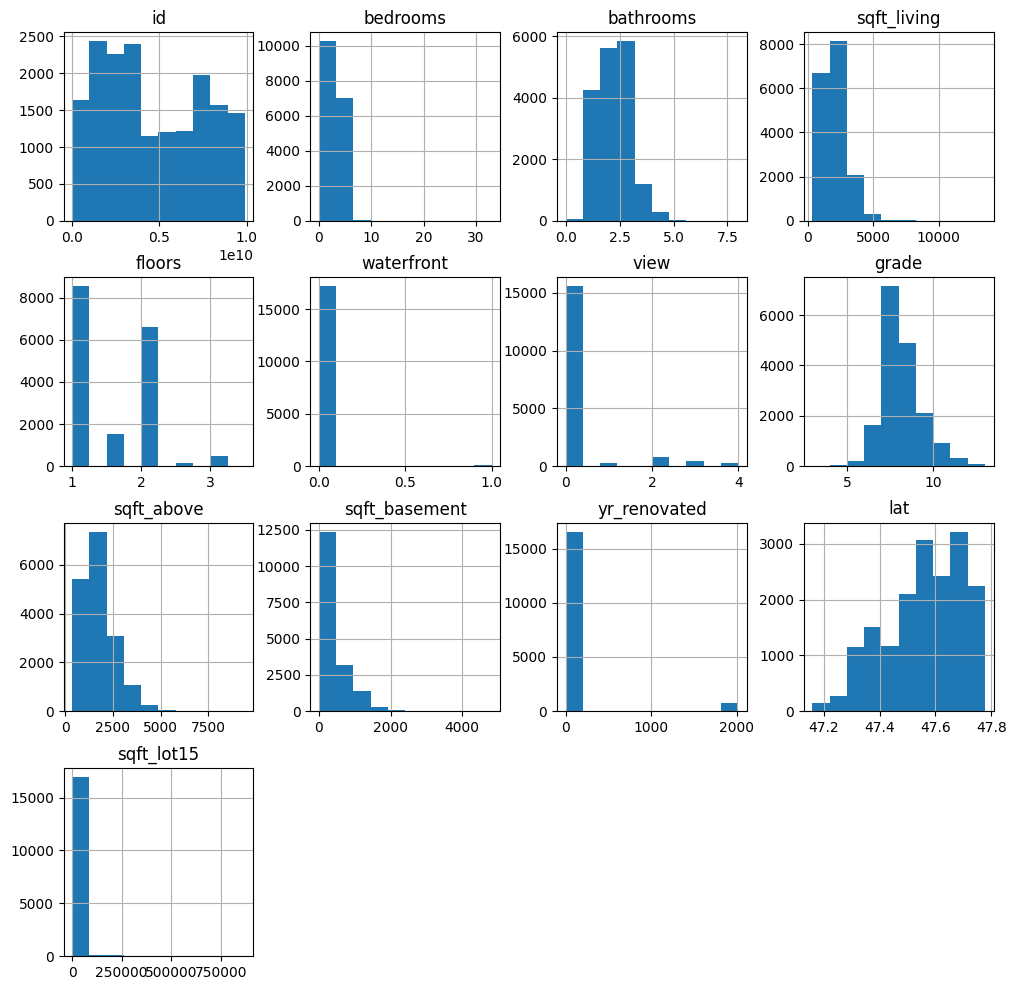

In [36]:
x_train.hist(figsize=(12,12))

In [30]:
x_train.corr()

,id,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15
id,1.000000,-0.001077,0.001400,-0.017829,0.014635,-0.004865,0.005524,0.003869,-0.014108,-0.010582,-0.021439,-0.003145,-0.138782
bedrooms,-0.001077,1.000000,0.513249,0.572312,0.175953,-0.010689,0.081345,0.354133,0.474589,0.299135,0.013070,-0.012442,0.029676
bathrooms,0.001400,0.513249,1.000000,0.755825,0.499465,0.061230,0.191518,0.664789,0.686354,0.283798,0.048174,0.020686,0.094386
sqft_living,-0.017829,0.572312,0.755825,1.000000,0.355466,0.107926,0.289902,0.763644,0.876067,0.435265,0.050111,0.044651,0.191185
floors,0.014635,0.175953,0.499465,0.355466,1.000000,0.021680,0.031219,0.460344,0.527511,-0.248760,0.002028,0.050450,-0.005703
waterfront,-0.004865,-0.010689,0.061230,0.107926,0.021680,1.000000,0.389846,0.087116,0.071408,0.090186,0.083463,-0.008934,0.029652
view,0.005524,0.081345,0.191518,0.289902,0.031219,0.389846,1.000000,0.255448,0.168877,0.285070,0.104609,0.009696,0.069971
grade,0.003869,0.354133,0.664789,0.763644,0.460344,0.087116,0.255448,1.000000,0.756044,0.169873,0.013735,0.105979,0.124884
sqft_above,-0.014108,0.474589,0.686354,0.876067,0.527511,0.071408,0.168877,0.756044,1.000000,-0.052795,0.015609,-0.007719,0.200583
sqft_basement,-0.010582,0.299135,0.283798,0.435265,-0.248760,0.090186,0.285070,0.169873,-0.052795,1.000000,0.074635,0.106883,0.021429


In [37]:
train_data = x_train.join(y_train)
train_data

,id,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_lot15,price_norm
12856,428100580,3,1.75,1970,1.0,0,0,7,1300,670,0,47.5107,8768,0.036066
8020,8150600195,4,2.75,1540,1.0,0,2,7,850,690,0,47.5491,4840,0.049180
2386,6151800486,2,1.00,1270,1.0,0,0,6,1270,0,0,47.3375,17699,0.024262
14371,1326049170,3,1.00,1720,1.0,0,0,7,860,860,0,47.7439,9998,0.026885
14359,106000395,3,1.00,1410,1.0,0,0,7,1410,0,0,47.7040,8042,0.043279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18965,1761300650,4,2.00,1710,1.0,0,0,7,1030,680,0,47.3950,7272,0.028852
3966,5152600090,5,2.50,2340,1.0,0,0,8,1670,670,0,47.3307,11000,0.021049
8573,3622069095,4,3.50,3420,2.0,0,0,9,3420,0,0,47.3534,49223,0.079213
932,6151800624,3,1.00,1250,1.0,0,0,6,1250,0,0,47.3414,15654,0.027980


In [41]:
#traing the model here we are trying the linearmodel first
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [52]:
print(f'Mean Squared Error is {mean_squared_error(y_test,y_pred):.4f}')
print(f'Mean Absolute Error is {mean_absolute_error(y_test,y_pred):.4f}')
print(f'r2 score is :  {r2_score(y_test,y_pred):.4f}')

Mean Squared Error is 0.0008
Mean Absolute Error is 0.0175
r2 score is :  0.6635
